In [6]:
import pymysql
conn = pymysql.connect(
        host='localhost',
        user='root',
        password="Tanuj@1997",
        db='crime_data',
)

conn

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
import pandas as pd 

query = "select * from crime_data"
df = pd.read_sql(query,conn)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [19]:
df.head(3)

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40


In [14]:
df.shape  #No. of columns and rows in data

(499, 13)

In [15]:
df.columns  # Name of the columns of the data 

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'AREA_NAME', 'Crm_Cd', 'Crm_Cd_Desc',
       'Vict_Age', 'Vict_Sex', 'Premis_Desc', 'Status', 'Location', 'LAT',
       'LON'],
      dtype='object')

In [16]:
df.info()  #Table Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     499 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB


In [17]:
df.describe()  # basic stat of the table of numerical columns

,DR_NO,Crm_Cd,Vict_Age,LAT,LON
count,4.990000e+02,499.000000,499.000000,499.000000,499.000000
mean,1.999930e+08,504.178357,32.142285,34.047335,-118.261283
std,8.742243e+06,198.381863,20.202136,0.053840,0.041560
min,1.030447e+07,210.000000,0.000000,33.710000,-118.560000
25%,2.001044e+08,330.000000,23.000000,34.040000,-118.260000
50%,2.001048e+08,442.000000,31.000000,34.050000,-118.250000
75%,2.001064e+08,624.000000,46.500000,34.050000,-118.240000
max,2.220130e+08,956.000000,78.000000,34.280000,-118.190000


In [18]:
df.isnull().sum()

DR_NO          0
Date_Rptd      0
DATE_OCC       0
AREA_NAME      0
Crm_Cd         0
Crm_Cd_Desc    0
Vict_Age       0
Vict_Sex       0
Premis_Desc    0
Status         0
Location       0
LAT            0
LON            0
dtype: int64

In [73]:
df.sample()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON,Month_OCC
430,200106377,02-03-2020,2020-02-02,Central,624,BATTERY - SIMPLE ASSAULT,22,M,NIGHT CLUB (OPEN EVENINGS ONLY),IC,3800 LOCKLAND DR,34.05,-118.25,February


In [76]:
 # Identifing Unique Values in specific coolumns:
df['AREA_NAME'].unique()

array(['Southwest', 'Central', 'N Hollywood', 'Mission', 'Van Nuys',
       'Wilshire', 'Rampart', 'Harbor', 'Pacific', 'Hollenbeck',
       'West LA', 'Northeast', 'Foothill', 'Hollywood', 'West Valley',
       '77th Street', 'Olympic', 'Devonshire', 'Southeast'], dtype=object)

In [77]:
df['Vict_Age'].unique()

array([36, 25, 76, 31, 23,  0, 29, 35, 41, 24, 40, 19, 38, 55, 66, 34, 44,
       57, 22, 28, 43, 46, 56, 67, 37, 60, 51, 52, 61, 59, 32, 30, 50, 45,
       62, 20, 58, 27, 48, 18, 26, 47, 21, 64, 39, 75, 12, 49, 71, 68, 69,
       13, 33, 53, 74, 65, 54,  8,  9, 63, 17, 73, 42, 72, 70, 78],
      dtype=int64)

In [81]:
df['Crm_Cd'].unique()

array([624, 745, 740, 442, 946, 341, 330, 930, 648, 354, 230, 761, 350,
       310, 480, 623, 440, 510, 210, 900, 888, 420, 886, 421, 647, 940,
       662, 220, 625, 755, 649, 901, 320, 890, 351, 956, 820, 812, 920,
       850, 666, 343], dtype=int64)

In [79]:
df['Status'].unique()

array(['AO', 'IC', 'AA', 'JO'], dtype=object)

In [83]:
# Identifing Distinct Crime code and their discription
distinct_crime = df.groupby('Crm_Cd')['Crm_Cd_Desc'].unique()
distinct_crime

Crm_Cd
210                                            [ROBBERY]
220                                  [ATTEMPTED ROBBERY]
230     [ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT]
310                                           [BURGLARY]
320                                [BURGLARY, ATTEMPTED]
330                              [BURGLARY FROM VEHICLE]
341    [THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,L...
343           [SHOPLIFTING-GRAND THEFT ($950.01 & OVER)]
350                                      [THEFT, PERSON]
351                                    [PURSE SNATCHING]
354                                  [THEFT OF IDENTITY]
420    [THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)]
421                 [THEFT FROM MOTOR VEHICLE - ATTEMPT]
440                 [THEFT PLAIN - PETTY ($950 & UNDER)]
442           [SHOPLIFTING - PETTY THEFT ($950 & UNDER)]
480                                      [BIKE - STOLEN]
510                                   [VEHICLE - STOLEN]
623                     

In [27]:
# Converting Date into Months in new column
df['DATE_OCC'] = df['DATE_OCC'].astype('datetime64[ns]')
df['Month_OCC'] = df['DATE_OCC'].dt.strftime('%B')

(df.sample())


,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON,Month_OCC
158,200104444,01-05-2020,2020-01-05,Central,330,BURGLARY FROM VEHICLE,23,M,PARKING LOT,IC,500 S BROADWAY,34.04,-118.26,January


In [29]:
sorted_months = df['Month_OCC'].value_counts().index.sort_values()
Num_of_crimes = df['Month_OCC'].value_counts()
sorted_months

Index(['April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September'],
      dtype='object', name='Month_OCC')

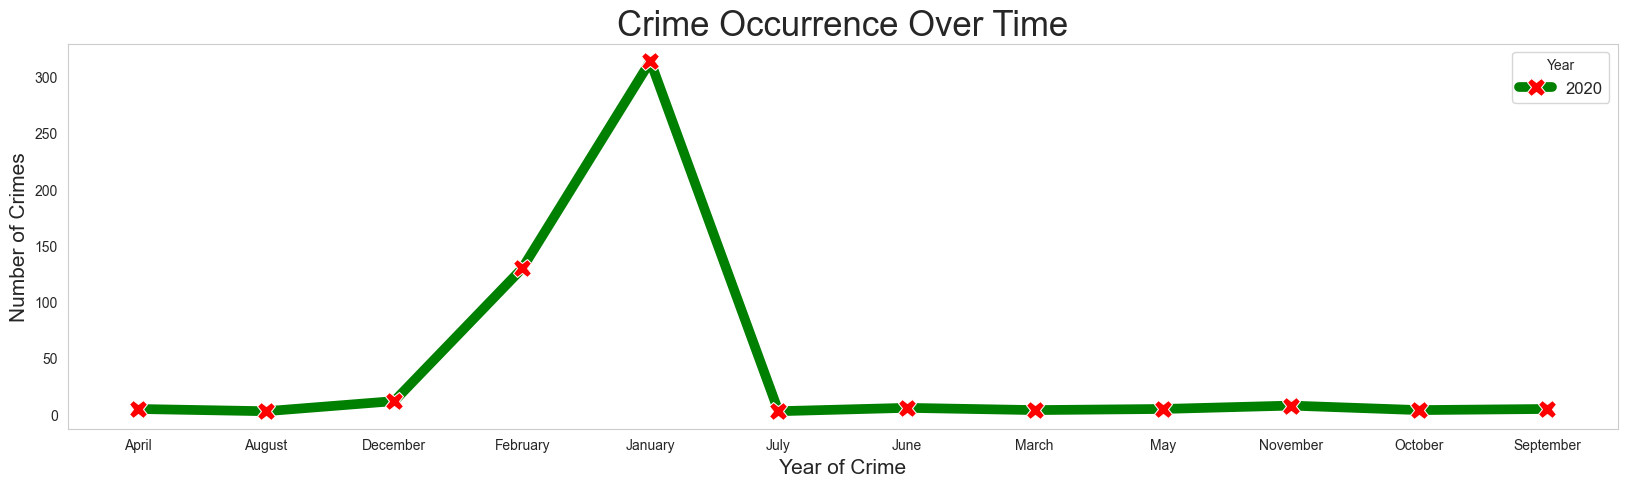

In [84]:
plt.figure(figsize = (20,5))
sns.lineplot(x= sorted_months,y=Num_of_crimes.loc[sorted_months],marker = 'X',markersize = 13,markerfacecolor='red',label = 2020,linewidth = 7,color ='green' )
plt.xlabel('Year of Crime',fontsize = 15)
plt.ylabel('Number of Crimes',fontsize = 15)
plt.title('Crime Occurrence Over Time',fontsize = 25)
plt.legend(title = 'Year',fontsize = 12)
plt.grid()

plt.show()

In [85]:
# Determining Crime case status
df['Status'].value_counts() 

Status
IC    447
AA     27
AO     24
JO      1
Name: count, dtype: int64

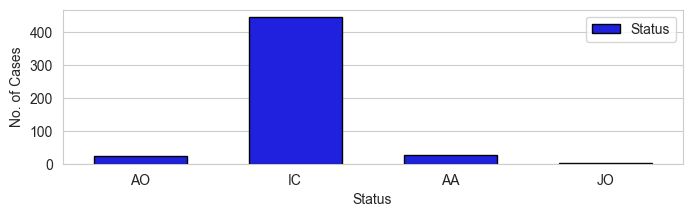

In [86]:
plt.figure(figsize = (8,2))
sns.countplot(x = df['Status'],width = .6,color = 'blue',edgecolor = 'black',label = 'Status')
plt.legend()
plt.ylabel('No. of Cases')
plt.show()

*********************************************************************************************************************************************

--------------------------------------------------------------------------------------------------------------------------------

Spatial Analysis:

Question 1 : Where are the geographical hotspots for reported crimes?

In [32]:
df[['LAT','LON']].head(5)

,LAT,LON
0,34.01,-118.30
1,34.05,-118.25
2,34.17,-118.40
3,34.22,-118.45
4,34.05,-118.26


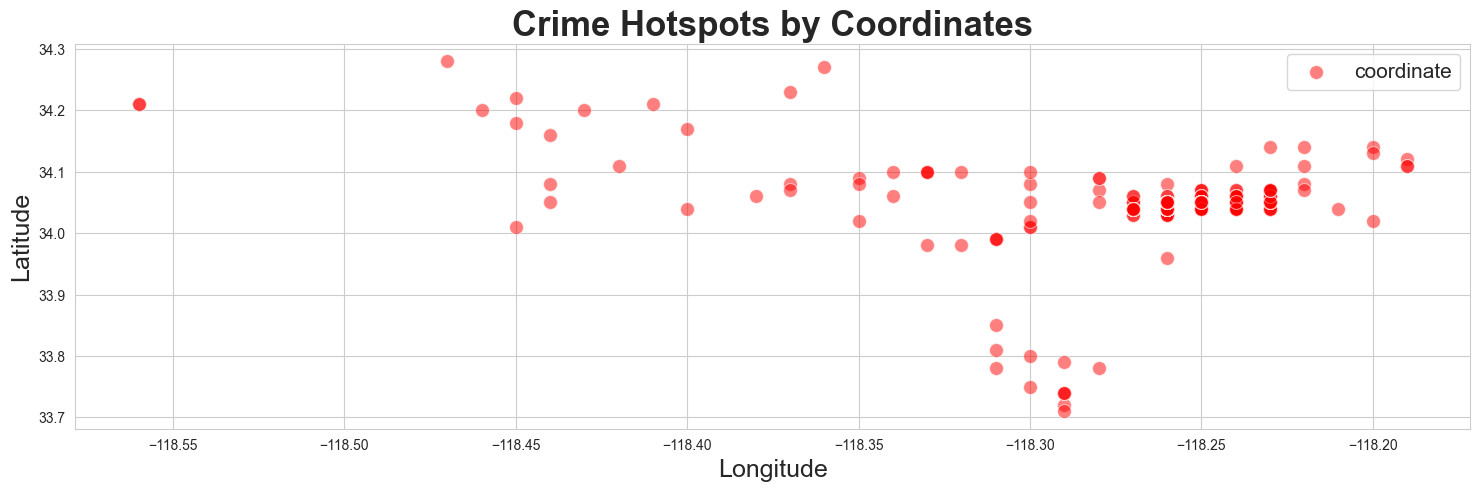

In [103]:
# Crime Hotspot Area by Coordinates:

plt.figure(figsize=(18, 5))
sns.scatterplot(x =df['LON'],y =df['LAT'], color='red', marker='o',s =100, alpha=0.5,label = 'coordinate')
plt.xlabel('Longitude',fontsize = 18)
plt.ylabel('Latitude',fontsize = 18)
plt.legend(fontsize = 15)
plt.title('Crime Hotspots by Coordinates',fontsize = 25,fontweight='bold')

plt.show()

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

Victim Demographics:

Question 2: What is the distribution of victim ages in reported crimes?

In [36]:
sex_group = df.groupby('Vict_Sex')['Vict_Age']
male = sex_group.get_group('M').astype('float')
female = sex_group.get_group('F').astype('float')
male
female.head(5)

0     36.0
2     76.0
11    24.0
14    38.0
16    66.0
Name: Vict_Age, dtype: float64

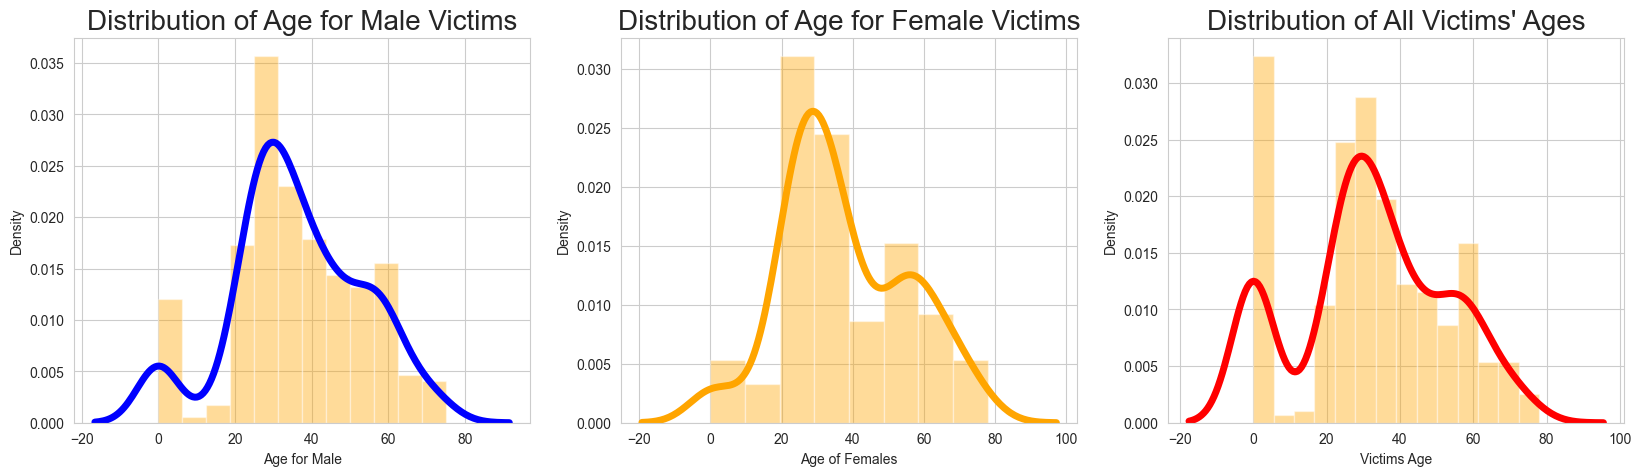

In [37]:
# Creating a subplot of distribution of Ages of victims gender wise

fig, axis=plt.subplots(nrows=1,ncols=3,figsize=(20,5))

#male
sns.set_style("whitegrid")
sns.distplot(male,color = 'orange',kde_kws={'linewidth': 5,'color':'blue'},ax = axis[0])
axis[0].set_title('Distribution of Age for Male Victims',fontsize = 20)
axis[0].set_xlabel('Age for Male') 

#Female
sns.distplot(female,color = 'orange',kde_kws={'linewidth': 5,'color':'orange'},ax = axis[1])
axis[1].set_title('Distribution of Age for Female Victims',fontsize = 20)
axis[1].set_xlabel('Age of Females')


#All victims

sns.distplot(df['Vict_Age'],color = 'orange',kde_kws={'linewidth': 5,'color':'red'},ax = axis[2])
axis[2].set_title('Distribution of All Victims\' Ages',fontsize = 20)
axis[2].set_xlabel('Victims Age')

plt.show()

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

Question 3: Is there a significant difference in crime rates between male and female victims?

In [20]:
df['Vict_Sex'].value_counts()

Vict_Sex
M    278
F    155
X     39
      27
Name: count, dtype: int64

In [21]:
df['Vict_Sex'].replace('','Unknown',inplace = True) # Replacing blank gender columns as Unknown Gender

In [22]:
df['Vict_Sex'].value_counts()

Vict_Sex
M          278
F          155
X           39
Unknown     27
Name: count, dtype: int64

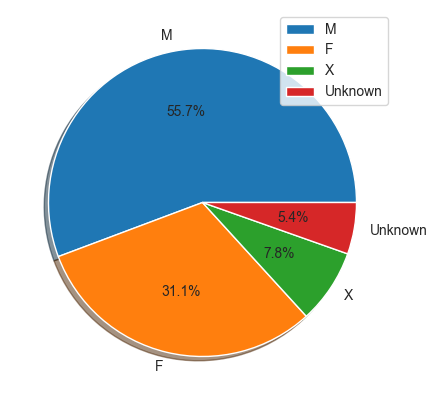

In [105]:
# Crime Rates based on Gender

plt.figure(figsize = (20,5))
plt.pie(df['Vict_Sex'].value_counts(),labels = df['Vict_Sex'].value_counts().index, autopct="%0.1f%%",colors=plt.cm.tab10.colors, shadow = True)
plt.legend(loc = 'upper right')

plt.show()

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

Location Analysis:

Question 4: Where do most crimes occur based on the "Location" column?

In [41]:
# Getting the data of Top hotspot Area for crime
area = df['AREA_NAME'].value_counts()
area_index = area.index
area_value = df['AREA_NAME'].value_counts()
area_index[:4]
area_value[:4]

AREA_NAME
Central      423
Northeast     12
Harbor        12
Rampart        8
Name: count, dtype: int64

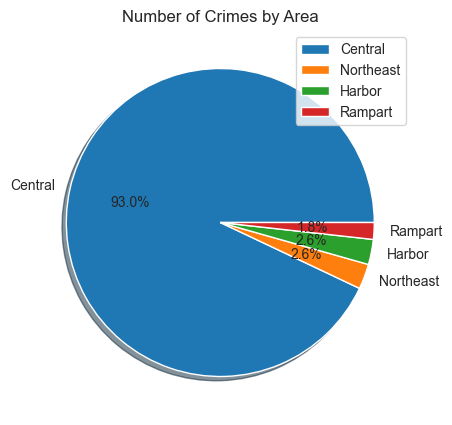

In [104]:
# Crime Hotspot Location by Area:

plt.figure(figsize = (20,5))
plt.pie(area_value[:4],labels = area_index[:4],autopct="%0.1f%%",colors=plt.cm.tab10.colors, shadow = True)
plt.title('Number of Crimes by Area')
plt.legend()
plt.show()

In [45]:
# Get the data of top 10 Hotspot Locations
crime_loc = df['Location'].value_counts()
c_location = crime_loc[:10]
c_location.head()

Location
800 N ALAMEDA ST      14
700 W 7TH ST          11
1100 S FIGUEROA ST     6
300 E 5TH ST           6
6TH                    6
Name: count, dtype: int64

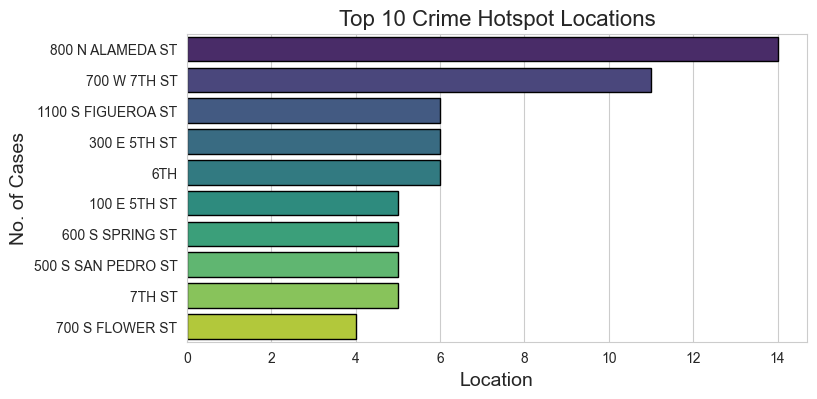

In [53]:
# Crime Crime Hotspot by Location:

plt.figure(figsize = (8,4))
sns.barplot(y = c_location.index,x = c_location.values,palette="viridis",edgecolor = 'black')
plt.xlabel('Location',fontsize = 14)
plt.ylabel('No. of Cases',fontsize = 14)
plt.title("Top 10 Crime Hotspot Locations",fontsize = 16)
plt.savefig('Crime Hotspot Location.png')
plt.show()


In [49]:
#Getting the data of Top 10 Crime Hotspot Premises
premis = df['Premis_Desc'].value_counts()
pre_desc = premis[:10]
pre_desc.head()

Premis_Desc
STREET                                          105
SIDEWALK                                         62
PARKING LOT                                      46
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     45
SINGLE FAMILY DWELLING                           25
Name: count, dtype: int64

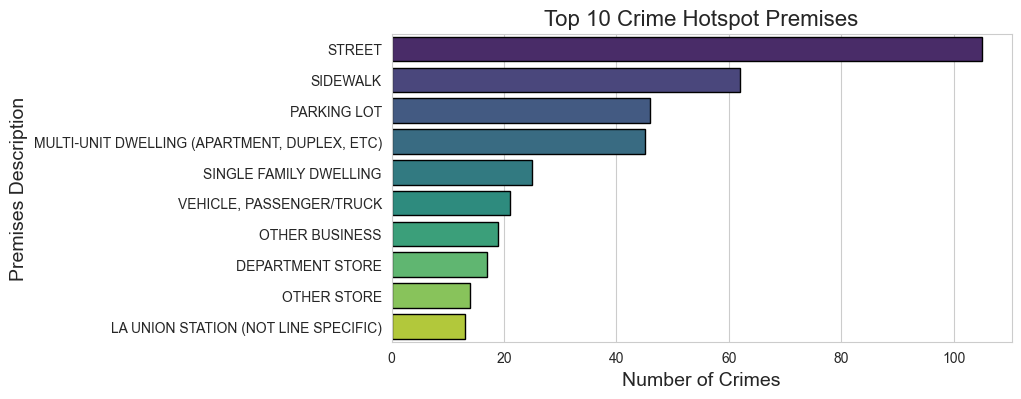

In [52]:
# Crime Hotspot Location by Premises:

plt.figure(figsize=(8, 4))
sns.barplot(y=pre_desc.index, x=pre_desc.values, palette="viridis",edgecolor  = 'black')
plt.title('Top 10 Crime Hotspot Premises', fontsize=16)
plt.xlabel('Number of Crimes', fontsize=14)
plt.ylabel('Premises Description', fontsize=14)

plt.show()


--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

Crime Code Analysis:

Question 5: What is the distribution of reported crimes based on Crime Code?

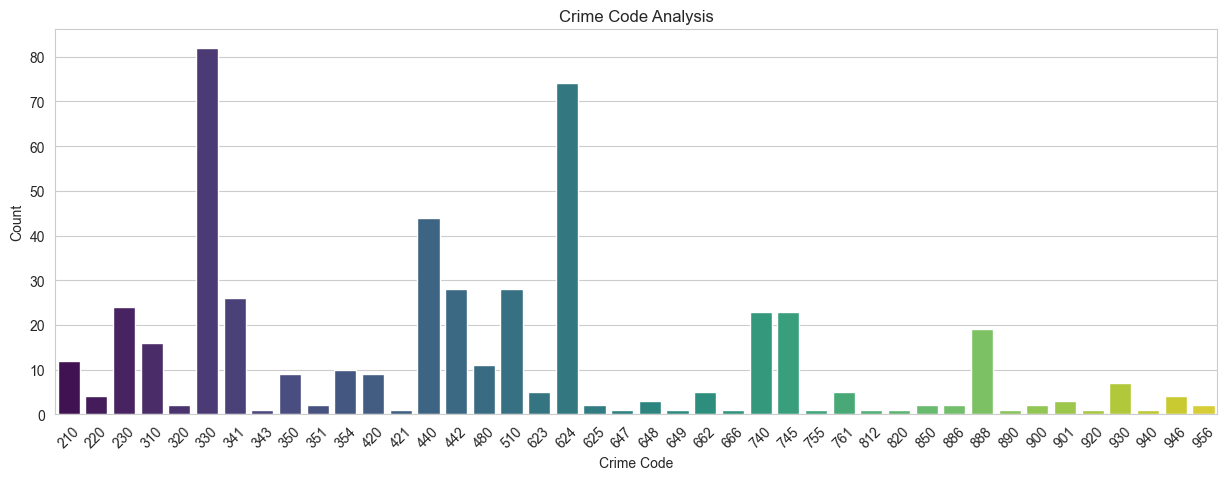

In [62]:
# Distribution of Reported Crimes

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='Crm_Cd', palette='viridis')
plt.title('Crime Code Analysis')
plt.xlabel('Crime Code')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()


                                                              THANK YOU!